In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib 

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
a = np.load('allSignal.npy')

In [3]:
e = np.load('allError.npy')

In [4]:
p = np.load('allInputs.npy',allow_pickle=True)

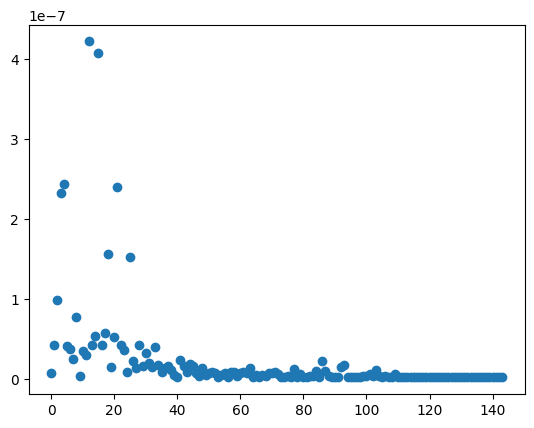

In [5]:
plt.figure()
plt.scatter(np.arange(len(e)),e)

In [6]:
goodIdx = np.argsort(e.flatten())

In [7]:
time = np.linspace(-.5,.5,49997)*1e3

In [8]:
goodIdx

array([124, 139, 130, 132, 122, 138,  96, 136, 140, 126, 141, 142, 129,
       112, 120,  97, 116, 135, 133, 118, 143, 134, 123,  80, 111, 117,
       105, 113,  73,  66,  81, 125, 119, 127,  56,  91, 115,  95,  89,
       107, 137, 131,  64,  98,  76, 121,  94, 110,  90, 128,  74, 108,
       114,  85,  40,  53,  78,  75, 104,   9,  82, 102,  68,  47, 106,
        83,  88,  59,  99, 100,  54,  67,  49,  39,  65,  79, 101, 109,
        72,  52,  46,   0,  55,  69,  60,  50,  62,  70,  71,  43,  24,
        57,  58,  61,  35,  51,  84,  87,  38, 103,  77,  48,  63,  27,
        36,  92,  19,  32,  42,  29,  37,  45,  93,  34,  44,  31,  26,
        86,  41,   7,  11,  30,  10,  23,   6,  33,   5,  22,  16,   1,
        13,  28,  20,  14,  17,   8,   2,  25,  18,   3,  21,   4,  15,
        12])

In [9]:
from scipy.io import loadmat

rawData = loadmat('Data/eCAPSdata_220303.mat')
a500 = list(rawData['eCAPSdata_220328'][0][-5])

rawSignal = a500[1][-1]-a500[1][0]
rawTime = a500[2][0]

timeLimits = np.intersect1d( np.where(rawTime < 9 )[0], np.where(rawTime>1)[0] )

rawTime = rawTime[timeLimits]
rawSignal = rawSignal[timeLimits]

rawSignal /= np.max(np.abs(rawSignal))

FileNotFoundError: [Errno 2] No such file or directory: 'Data/eCAPSdata_220303.mat'

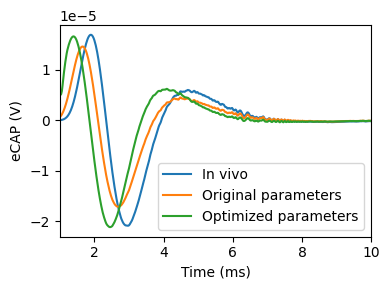

In [10]:
plt.figure(figsize=(4,3))


groundTruth = np.load('../optimizeFractions_sweep/groundTruth/Signals_Stim_500.npy')
original = a[0]
optimal = a[goodIdx[0]]

plt.plot(time,groundTruth[0,0])
plt.plot(time,original[0,0])
plt.plot(time,optimal[0,0])


plt.xlabel('Time (ms)')
plt.ylabel('eCAP (V)')

plt.legend(['In vivo','Original parameters','Optimized parameters'])

plt.xlim([1,10])

plt.tight_layout()

#plt.savefig('Optimization.png',dpi=600)

In [11]:
from vagusNerve.nerveSetup import gammaDist
from vagusNerve.nerveSetup import loadDiameterDistribution
from vagusNerve.utils import getDiameters
import quantities as pq
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

In [12]:
d = getDiameters()

In [13]:
d = d / pq.m # Removes units for compatibility reasons

binSizeSamples = np.diff(d)[0]

empiricalDiams, empiricalProbs = loadDiameterDistribution('maff')

binSizeData = np.diff(empiricalDiams)[0] # Taking the first element ignores sloppy digitization towards the far end

binRatio = binSizeSamples/binSizeData

interp = interp1d(empiricalDiams,empiricalProbs,bounds_error=False,fill_value='extrapolate')

interpD = interp(d)

interpD[np.where(interpD<0)]=0


paramsMaff = curve_fit(gammaDist,d*1e6,interpD*10,p0=[9,0.5],bounds=(0,np.inf))

In [14]:
empiricalDiams, empiricalProbs = loadDiameterDistribution('meff')

binSizeData = np.diff(empiricalDiams)[0] # Taking the first element ignores sloppy digitization towards the far end

binRatio = binSizeSamples/binSizeData

interp = interp1d(empiricalDiams,empiricalProbs,bounds_error=False,fill_value='extrapolate')

interpD = interp(d)

interpD[np.where(interpD<0)]=0


paramsMeff = curve_fit(gammaDist,d*1e6,interpD*10,p0=[9,0.5],bounds=(0,np.inf))

In [15]:
paramsMaff

(array([7.72427782, 0.42498444]),
 array([[ 1.13256639e-02, -6.45438444e-04],
        [-6.45438444e-04,  3.86336358e-05]]))

In [16]:
paramsMeff

(array([9.28229805, 0.35998345]),
 array([[ 1.43395417e-02, -5.72392447e-04],
        [-5.72392447e-04,  2.37991868e-05]]))

(0.0, 10.0)

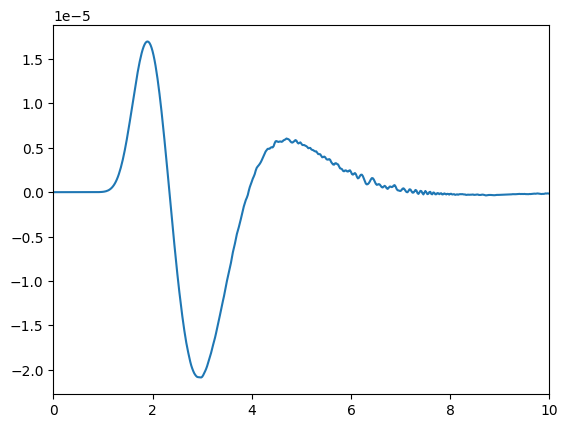

In [16]:
plt.figure()
plt.plot(time,groundTruth[0,0])
plt.xlim([0,10])